# Analisis estadístico de partidas Blitz - `bbadd13`

### Diccionario de Datos

`df_white` - `df_black` (DataFrames correspondientes con variables anadidas)

| Variable      | Tipo    | Descripción                                                        |
| ------------- | ------- | ------------------------------------------------------------------ |
| `game_id` | object     | ID del juego |
| `date`       | object  | Fecha del juego (AAAA.MM.DD)                      |
| `white` | object  | Nombre de usuario de quien lleva las piezas blancas                        |
| `black`   | object  | Nombre de usuario de quien lleva las piezas negras                       |
| `white_elo`  | int | ELO de las piezas blancas                        |
| `black_elo`  | int | ELO de las piezas negras                        |
| `result`     | object | Resultado de la partida (1/2-1/2, 0-1 o 1-0) |
| `opening` | object | Apertura jugada en esa partida    |
| `eco` | object | Codigo ECO de la apertura |
| `move_number` | int | Numero del movimiento | 
| `player_to_move` | object | Pieza que debe hacer el movimiento |
| `move_san` | object | Notacion estandar |
| `fen_before` | object | Representacion del tablero antes del movimiento en notacion FEN |
| `time_remaining` | object | Tiempo sobrante desde el movimiento |
| `best_move` | object | Mejor movimiento por Stockfish 17.1 en notacion UCI |
| `eval_before` | float | Evaluacion de la posicion antes del movimiento en Centipeones |
| `eval_after` | float | Evaluacion de la posicion despues del movimiento en Centipeones |
| `centipawn_loss` | float | Perdida de Centipeones por movimiento |
| `avg_cpl_player_game` | float | Promedio de CPL por jugador en el juego |
| `avg_cpl_game` | float | Promedio de CPL por juego |
| `accuracy_game_player` | float |  Accuracy del Target Player en juego |

Estos DataFrames contienen la información de la partida cuando el `Target Player` juega con las piezas blancas y negras respectivamente.

Está conformado por todos los movimientos de todas las partidas parseadas y analizadas con los scripts anteriores, esto quiere decir, que todos los registros tienen data de ambos `Jugadores` por movimiento.

DFs como `df_white_moves` - `df_black_moves` contienen las mismas variables pero los registros solamente corresponden a los movimientos del `Target Player`

### Carga de datos

* Creación y exploración de los DataFrames

In [ ]:
import pandas as pd

df_white = pd.read_csv(r"D:\Chess\Analisis\data\processed\games_with_analysis_white.csv")

#df_white.head()
#df_white.info()
#df_white.describe()
#df_white.isnull().sum()

In [ ]:
df_black = pd.read_csv(r"D:\Chess\Analisis\data\processed\games_with_analysis_black.csv")

#df_black.head()
#df_black.describe()
#df_black.info()
#df_black.isnull().sum()

## Resultados por partida

* Resultados con piezas blancas:
    * Partida perdida
    * Partida ganada
    * Tablas

* Resultados con piezas negras:
    * Partida ganada
    * Partida perdida
    * Tablas

* ELO promedio
    * Descripción estadística del ELO
    * Distribución con piezas negras y blancas

* ELO promedio contricante
    * Descripcion estadistica del ELO
    * Distribucion con piezas negras y blancas

In [71]:
#print(df.groupby("result").size()) \\ Se hce el conteo por movimiento en lugar por partida
df_games_white = df_white.groupby("game_id").last().reset_index()
print(f"Resultado de partida con piezas blancas\n", df_games_white.groupby("result").size())

Resultado de partida con piezas blancas
 result
0-1        73
1-0        78
1/2-1/2     7
dtype: int64


In [72]:
df_games_black = df_black.groupby("game_id").last().reset_index()
print(f"Resultado de partida con piezas negras\n", df_games_black.groupby("result").size())

Resultado de partida con piezas negras
 result
0-1        90
1-0        71
1/2-1/2     5
dtype: int64


### ELO promedio


ELO Descripcion estadistica:
count     324.000000
mean     1291.416667
std        90.845508
min      1121.000000
25%      1201.500000
50%      1307.000000
75%      1354.500000
max      1500.000000
dtype: float64


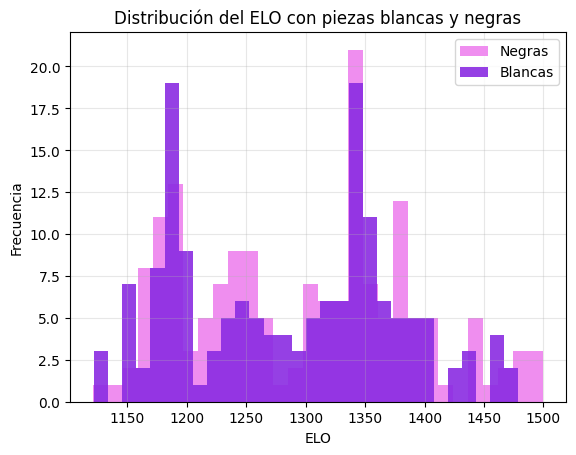

In [73]:
#Concatenacion de los ELOS
ELOS = pd.concat([df_games_white["white_elo"], df_games_black["black_elo"]])

ELO_prommedio = ELOS.mean()
ELO_describe = ELOS.describe()

print(f"\nELO Descripcion estadistica:\n{ELO_describe}")

import matplotlib.pyplot as plt

plt.Figure(figsize=(16, 8))
plt.hist(df_games_black['black_elo'], bins=30, alpha=0.9, label="Negras", color='violet')
plt.hist(df_games_white['white_elo'], bins=30, alpha=0.9, label="Blancas", color='blueviolet')
#plt.hist(ELOS, bins=30, color='blue', alpha=0.7)
plt.title("Distribución del ELO con piezas blancas y negras")
plt.xlabel("ELO")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### ELO promedio contricante


ELO Descripcion estadistica:
count     324.000000
mean     1298.604938
std       140.198946
min       981.000000
25%      1206.500000
50%      1293.000000
75%      1361.000000
max      2404.000000
dtype: float64


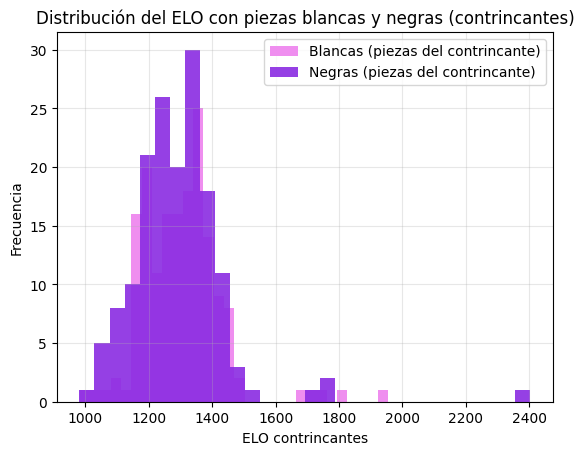

In [74]:
#Concatenacion de los ELOS
ELOS_CONTRINCANTES = pd.concat([df_games_white["black_elo"], df_games_black["white_elo"]])

ELO_prommedio_contrincantes = ELOS_CONTRINCANTES.mean()
ELO_describe_contrincantes = ELOS_CONTRINCANTES.describe()

print(f"\nELO Descripcion estadistica:\n{ELO_describe_contrincantes}")

import matplotlib.pyplot as plt

plt.Figure(figsize=(16, 8))
plt.hist(df_games_black['white_elo'], bins=30, alpha=0.9, label="Blancas (piezas del contrincante)", color='violet')
plt.hist(df_games_white['black_elo'], bins=30, alpha=0.9, label="Negras (piezas del contrincante)", color='blueviolet')
#plt.hist(ELOS, bins=30, color='blue', alpha=0.7)
plt.title("Distribución del ELO con piezas blancas y negras (contrincantes)")
plt.xlabel("ELO contrincantes")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Aperturas

In [75]:
#Aperturas mas jugadas

aperturas_general = pd.concat([df_games_white["opening"], df_games_black["opening"]])

print(f"Aperturas mas jugadas en general:\n", aperturas_general.value_counts().head(10))

Aperturas mas jugadas en general:
 opening
Four Knights Game: Italian Variation            21
Italian Game: Anti-Fried Liver Defense          21
Vienna Game                                     12
King's Pawn Game: Leonardis Variation           11
Owen Defense                                    11
Scotch Game                                     10
Queen's Pawn Game                                9
Queen's Pawn Game: Accelerated London System     8
Three Knights Opening                            8
Modern Defense                                   7
Name: count, dtype: int64


In [76]:
print(f"Aperturas mas jugadas con piezas blancas:\n", df_games_white["opening"].value_counts(). head(10))

Aperturas mas jugadas con piezas blancas:
 opening
Four Knights Game: Italian Variation         18
Vienna Game                                  12
Modern Defense                                7
Petrov's Defense: Three Knights Game          7
Caro-Kann Defense                             6
Three Knights Opening                         6
Philidor Defense                              6
Queen's Pawn Game: Zukertort Variation        5
Petrov's Defense: Italian Variation           5
Scandinavian Defense: Valencian Variation     5
Name: count, dtype: int64


In [77]:
print(f"Aperturas mas jugadas con piezas negras:\n", df_games_black["opening"].value_counts().head(10))

Aperturas mas jugadas con piezas negras:
 opening
Italian Game: Anti-Fried Liver Defense          20
King's Pawn Game: Leonardis Variation           11
Scotch Game                                     10
Queen's Pawn Game: Accelerated London System     8
Owen Defense                                     8
Queen's Pawn Game                                8
Bishop's Opening                                 7
Hungarian Opening                                6
Van't Kruijs Opening                             6
Ruy Lopez: Steinitz Defense                      5
Name: count, dtype: int64


### Métricas de calidad de juego 

* Pérdida de centipeones promedio
    * General 
    * Piezas blancas (por jugador en partida y por partida)
    * Piezas negras (por jugador en partida y por partida)
* Errores y blunders
    * Movimientos con pérdida de  >100 o >300 centipeones
    * General
    * Piezas blancas
    * Piezas negras
* Accuracy


⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️

El CPL no es un valor único por partida, es un valor por movimiento
1. El DataFrame contiene valores de los CPL por movimiento de forma intercalada, para promediar el CPL por partida por cada jugador es necesario sumar solamente los CPL por cada movimiento de cada jugador
2. Para calcular el CPL promedio de partida (ambos jugadores) se tienen que iterar por los movimientos de ambos jugadores

In [78]:
#Filtrado por jugadas de blancas y negras
df_white_moves = df_white[df_white["player_to_move"] == "white"]
df_black_moves = df_black[df_black["player_to_move"] == "black"]

In [79]:
#CPL promedio por partida, solo movimientos de blancas
df_cpl_player_game_white = df_white_moves.groupby("game_id").agg(avg_cpl_player_game = ("centipawn_loss", "mean")).reset_index()
df_cpl_player_game_black = df_black_moves.groupby("game_id").agg(avg_cpl_player_game = ("centipawn_loss", "mean")).reset_index()

In [80]:
#Prueba para corroborar el cpl promedio del jugador en una partida
game_id_buscado = "vjvRbZTO"

df_cpl_player_game_white[df_cpl_player_game_white["game_id"] == game_id_buscado]

,game_id,avg_cpl_player_game
147,vjvRbZTO,190.088889


In [81]:
#CPL promedio en cada partida (ambos jugadores)
df_cpl_game_white = df_white.groupby("game_id").agg(avg_cpl_game = ("centipawn_loss", "mean")).reset_index()
df_cpl_game_black = df_black.groupby("game_id").agg(avg_cpl_game = ("centipawn_loss", "mean")).reset_index()

In [82]:
#Prueba para corroborar el cpl promedio en una partida
game_id_buscado = "vjvRbZTO"

df_cpl_game_white[df_cpl_game_white["game_id"] == game_id_buscado]

,game_id,avg_cpl_game
147,vjvRbZTO,2.505618


In [83]:
df_white = df_white.merge(df_cpl_player_game_white, on="game_id", how="left")
df_white = df_white.merge(df_cpl_game_white, on="game_id", how="left")

df_black = df_black.merge(df_cpl_player_game_black, on="game_id", how="left")
df_black = df_black.merge(df_cpl_game_black, on="game_id", how="left")

CPL promedio por movimiento del jugador con piezas blancas: 447.3360349964842
CPL promedio por movimientos del jugador con piezas negras: 104.10289047954271
CPL promedio por movimientos del jugador en general: 271.4820165094092


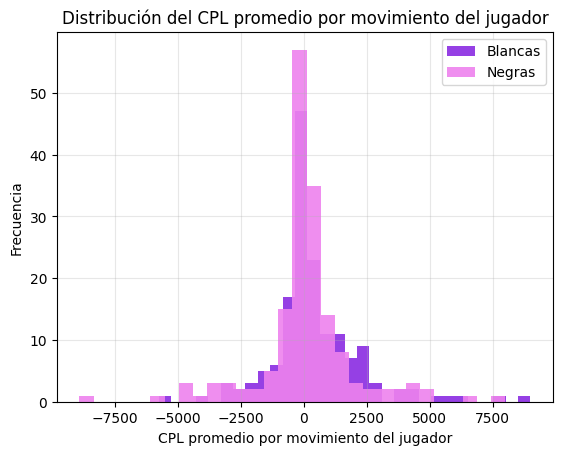

In [84]:
cpl_promedio_white_games = df_cpl_player_game_white["avg_cpl_player_game"].mean()
print(f"CPL promedio por movimiento del jugador con piezas blancas: {cpl_promedio_white_games}")

cpl_promedio_black_games = df_cpl_player_game_black["avg_cpl_player_game"].mean()
print(f"CPL promedio por movimientos del jugador con piezas negras: {cpl_promedio_black_games}")

cpl_promedio_general_games = pd.concat([df_cpl_player_game_white["avg_cpl_player_game"], df_cpl_player_game_black["avg_cpl_player_game"]]).mean()
print(f"CPL promedio por movimientos del jugador en general: {cpl_promedio_general_games}")

plt.hist(df_cpl_player_game_white["avg_cpl_player_game"], bins=30, alpha=0.9, label="Blancas", color='blueviolet')
plt.hist(df_cpl_player_game_black["avg_cpl_player_game"], bins=30, alpha=0.9, label="Negras", color='violet')
plt.title("Distribución del CPL promedio por movimiento del jugador")
plt.xlabel("CPL promedio por movimiento del jugador")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Esta grafica no nos sirve mucho ya que el cpl promedio por movimiento no nos indica exactamente el rendimiento del jugador en partida ni cuales movimientos fueron mejores o peores, es una grafica que solamente indica la frecuencia del cpl donde 0 pueden ser jugadas normales y no necesariamente indica partodas brillantes en su mayoria

In [85]:
#De momento no unificaremos ambos csv ya que asi como estan divididos en white y black nos es mas facil trabajar con ellos para identificar partidas propias y patrones por color
#Unifica ambos DFs (blancas y negras)
#df_all_games = pd.concat([df_white, df_black], ignore_index=True)

### Errores y Blunders

In [86]:
def clasificar_jugada(cp_loss):
    if cp_loss <= 20:
        return "Excelente"
    elif cp_loss <= 50:
        return "Buena"
    elif cp_loss <= 100:
        return "Inexactitud"
    elif cp_loss <= 300:
        return "Error"
    else:
        return "Blunder"

# Aplicar clasificación
df_white_moves["clasificacion"] = df_white_moves["centipawn_loss"].apply(clasificar_jugada)
df_black_moves["clasificacion"] = df_black_moves["centipawn_loss"].apply(clasificar_jugada)

# Resumen por color
resumen_white = df_white_moves["clasificacion"].value_counts()
resumen_black = df_black_moves["clasificacion"].value_counts()

print("Clasificación Blancas:\n", resumen_white)
print("\nClasificación Negras:\n", resumen_black)

print(f"Coincide el numero de jugadas por csv respecto a movimientos propios: {resumen_white.sum() + resumen_black.sum()}")

Clasificación Blancas:
 clasificacion
Excelente      2013
Blunder        1474
Error           631
Inexactitud     514
Buena           250
Name: count, dtype: int64

Clasificación Negras:
 clasificacion
Excelente      2973
Blunder        1530
Error           412
Inexactitud     215
Buena           174
Name: count, dtype: int64
Coincide el numero de jugadas por csv respecto a movimientos propios: 10186


Fórmula aproximada usada por Lichess

La fórmula que tiene Lichess para calcular el accuracy contempla el cálculo del porcentaje de ganar por cada movimiento mediante la siguiente fórmula:

$\text{Win\%} = 50 + 50 \cdot \left( \frac{2}{1 + \exp(-0.00368208 \cdot \text{centipawns})} - 1 \right)$

Esto convierte la evaluacion de Stockfish (en centipeones) en una probabilidad de victoria

Ya calculado el Win%, se puede calcular el Accuracy% de cada jugada

Se compara el Win% anterior y el Win% posterior de las jugadas respectivamente:


$\text{Accuracy\%} = (103.1668)e^{(-0.04354)(\text{Win\%Before} - \text{Win\%After})} - 3.1669$

El Accuracy nos indica que tanto la partida estuvo cerca de la mejor jugada

In [87]:
import numpy as np

#Fórmula de Lichess para Win%
def win_percent(cp):

    return 50 + 50 * (2 / (1 + np.exp(-0.00368208 * cp)) - 1)

#Fórmula de Lichess para Accuracy%
def move_accuracy(win_before, win_after):

    return 103.1668 * np.exp(-0.04354 * abs(win_before - win_after)) - 3.1669

#Funcion para calcular el accuracy por partida
def calcular_accuracy_df(df_moves):

    resultados = []

    for game_id, group in df_moves.groupby("game_id"):
        group = group.sort_values("move_number").reset_index(drop=True)

        #Win% antes y después del movimiento usando eval_before y eval_after
        win_before = win_percent(group["eval_before"])
        win_after  = win_percent(group["eval_after"])

        # Accuracy por movimiento
        accuracy_move = move_accuracy(win_before, win_after)

        # Promedio del accuracy por partida
        accuracy_game = accuracy_move.mean(skipna=True)

        resultados.append({
            "game_id": game_id,
            "accuracy_game_player": accuracy_game
        })

    return pd.DataFrame(resultados)

# Aplicar a movimientos propios de blancas y negras
df_accuracy_white = calcular_accuracy_df(df_white_moves)
df_accuracy_black = calcular_accuracy_df(df_black_moves)

In [88]:
df_white = df_white.merge(df_accuracy_white, on="game_id", how="left")
df_black =  df_black.merge(df_accuracy_black, on="game_id", how="left")

In [89]:
df_white

,game_id,date,white,black,white_elo,black_elo,result,opening,eco,move_number,...,move_san,fen_before,time_remaining,best_move,eval_before,eval_after,centipawn_loss,avg_cpl_player_game,avg_cpl_game,accuracy_game_player
0,vjvRbZTO,2025.08.13,Bbadd13,Sherafkan_nematov,1479,1474,1/2-1/2,Four Knights Game: Italian Variation,C47,1,...,e4,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,0:03:00,e2e4,39.0,-42.0,81.0,190.088889,2.505618,63.629586
1,vjvRbZTO,2025.08.13,Bbadd13,Sherafkan_nematov,1479,1474,1/2-1/2,Four Knights Game: Italian Variation,C47,2,...,e5,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,0:03:00,c7c5,-34.0,41.0,-75.0,190.088889,2.505618,63.629586
2,vjvRbZTO,2025.08.13,Bbadd13,Sherafkan_nematov,1479,1474,1/2-1/2,Four Knights Game: Italian Variation,C47,3,...,Nc3,rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBN...,0:03:00,g1f3,35.0,-24.0,59.0,190.088889,2.505618,63.629586
3,vjvRbZTO,2025.08.13,Bbadd13,Sherafkan_nematov,1479,1474,1/2-1/2,Four Knights Game: Italian Variation,C47,4,...,Nc6,rnbqkbnr/pppp1ppp/8/4p3/4P3/2N5/PPPP1PPP/R1BQK...,0:02:59,g8f6,-19.0,14.0,-33.0,190.088889,2.505618,63.629586
4,vjvRbZTO,2025.08.13,Bbadd13,Sherafkan_nematov,1479,1474,1/2-1/2,Four Knights Game: Italian Variation,C47,5,...,Nf3,r1bqkbnr/pppp1ppp/2n5/4p3/4P3/2N5/PPPP1PPP/R1B...,0:03:00,g1f3,19.0,-13.0,32.0,190.088889,2.505618,63.629586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,JDopcvU1,2021.06.28,Bbadd13,jhurem80,1365,1745,0-1,Queen's Pawn Game: Zukertort Variation,D02,91,...,Ra2,8/5pk1/4n2p/7P/5n2/5PK1/4p3/R4r2 w - - 6 46,0:03:01,a1b1,-9995.0,9997.0,-19992.0,-3879.187500,-292.884211,28.233951
9664,JDopcvU1,2021.06.28,Bbadd13,jhurem80,1365,1745,0-1,Queen's Pawn Game: Zukertort Variation,D02,92,...,e1=Q+,8/5pk1/4n2p/7P/5n2/5PK1/R3p3/5r2 b - - 7 46,0:03:35,f1g1,9997.0,-9997.0,19994.0,-3879.187500,-292.884211,28.233951
9665,JDopcvU1,2021.06.28,Bbadd13,jhurem80,1365,1745,0-1,Queen's Pawn Game: Zukertort Variation,D02,93,...,Kg4,8/5pk1/4n2p/7P/5n2/5PK1/R7/4qr2 w - - 0 47,0:03:00,g3g4,-9997.0,9997.0,-19994.0,-3879.187500,-292.884211,28.233951
9666,JDopcvU1,2021.06.28,Bbadd13,jhurem80,1365,1745,0-1,Queen's Pawn Game: Zukertort Variation,D02,94,...,Rg1+,8/5pk1/4n2p/7P/5nK1/5P2/R7/4qr2 b - - 1 47,0:03:34,f1g1,9997.0,-9998.0,19995.0,-3879.187500,-292.884211,28.233951


In [90]:
df_black

,game_id,date,white,black,white_elo,black_elo,result,opening,eco,move_number,...,move_san,fen_before,time_remaining,best_move,eval_before,eval_after,centipawn_loss,avg_cpl_player_game,avg_cpl_game,accuracy_game_player
0,6GYL41TA,2025.08.25,Kotopes224,Bbadd13,1415,1477,1-0,"Nimzo-Indian Defense: Rubinstein System, Taima...",E40,1,...,c4,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,0:03:00,e2e4,39.0,-6.0,45.0,-283.458333,-8.916667,40.672742
1,6GYL41TA,2025.08.25,Kotopes224,Bbadd13,1415,1477,1-0,"Nimzo-Indian Defense: Rubinstein System, Taima...",E40,2,...,e6,rnbqkbnr/pppppppp/8/8/2P5/8/PP1PPPPP/RNBQKBNR ...,0:03:00,e7e5,-15.0,38.0,-53.0,-283.458333,-8.916667,40.672742
2,6GYL41TA,2025.08.25,Kotopes224,Bbadd13,1415,1477,1-0,"Nimzo-Indian Defense: Rubinstein System, Taima...",E40,3,...,d4,rnbqkbnr/pppp1ppp/4p3/8/2P5/8/PP1PPPPP/RNBQKBN...,0:02:59,d2d4,28.0,-30.0,58.0,-283.458333,-8.916667,40.672742
3,6GYL41TA,2025.08.25,Kotopes224,Bbadd13,1415,1477,1-0,"Nimzo-Indian Defense: Rubinstein System, Taima...",E40,4,...,Nc6,rnbqkbnr/pppp1ppp/4p3/8/2PP4/8/PP2PPPP/RNBQKBN...,0:03:00,d7d5,-29.0,52.0,-81.0,-283.458333,-8.916667,40.672742
4,6GYL41TA,2025.08.25,Kotopes224,Bbadd13,1415,1477,1-0,"Nimzo-Indian Defense: Rubinstein System, Taima...",E40,5,...,e3,r1bqkbnr/pppp1ppp/2n1p3/8/2PP4/8/PP2PPPP/RNBQK...,0:02:58,a2a3,52.0,-61.0,113.0,-283.458333,-8.916667,40.672742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10675,jVqY198g,2021.04.18,Emansuherman,Bbadd13,1822,1500,1-0,King's Gambit Accepted: Schallopp Defense,C34,29,...,Nxf6+,r1bqr1k1/ppp2p2/3p1p1p/b2N4/3NP3/3B4/PPP3PP/R2...,0:04:04,d5f6,675.0,-689.0,1364.0,-974.187500,306.212121,41.743354
10676,jVqY198g,2021.04.18,Emansuherman,Bbadd13,1822,1500,1-0,King's Gambit Accepted: Schallopp Defense,C34,30,...,Kf8,r1bqr1k1/ppp2p2/3p1N1p/b7/3NP3/3B4/PPP3PP/R2Q1...,0:03:53,d8f6,-702.0,688.0,-1390.0,-974.187500,306.212121,41.743354
10677,jVqY198g,2021.04.18,Emansuherman,Bbadd13,1822,1500,1-0,King's Gambit Accepted: Schallopp Defense,C34,31,...,Qh5,r1bqrk2/ppp2p2/3p1N1p/b7/3NP3/3B4/PPP3PP/R2Q1R...,0:04:00,d1c1,751.0,-668.0,1419.0,-974.187500,306.212121,41.743354
10678,jVqY198g,2021.04.18,Emansuherman,Bbadd13,1822,1500,1-0,King's Gambit Accepted: Schallopp Defense,C34,32,...,Re7,r1bqrk2/ppp2p2/3p1N1p/b6Q/3NP3/3B4/PPP3PP/R4RK...,0:03:50,a5d2,-742.0,9999.0,-10741.0,-974.187500,306.212121,41.743354


### Análisis por fase de la partida

* CPL por cada fase de la partida propia y de los adversarios

In [91]:
def fase_partida(move):
    if move <= 10:
        return "Apertura"
    if move <= 30:
        return "Medio juego"
    else:
        return "Final"
    
df_white_moves["fase_game"] = df_white_moves["move_number"].apply(fase_partida)
df_black_moves["fase_game"] = df_black_moves["move_number"].apply(fase_partida)

In [92]:
orden = ["Apertura", "Medio juego", "Final"]

df_white_moves["fase_game"] = pd.Categorical(
    df_white_moves["fase_game"],
    categories=orden,
    ordered=True
)

estadisticas_fase_white = df_white_moves.groupby("fase_game").agg(
    avg_cpl = ("centipawn_loss", "mean"),
    errores = ("centipawn_loss", lambda x: (x > 100).sum()),
    errores_promedio = ("centipawn_loss", lambda x: (x > 100).mean()),
    blunders = ("centipawn_loss", lambda x: (x > 300).sum()),
    blunders_promedio = ("centipawn_loss", lambda x: (x > 300).mean()),
    movimientos = ("centipawn_loss", "count")
).reset_index()

print(f"Numero de errores y blunders por fase de partidas de movimientos propios con blancas: \n",estadisticas_fase_white)

df_black_moves["fase_game"] = pd.Categorical(
    df_black_moves["fase_game"],
    categories=orden,
    ordered=True
)

estadisticas_fase_black = df_black_moves.groupby("fase_game").agg(
    avg_cpl = ("centipawn_loss", "mean"),
    errores = ("centipawn_loss", lambda x: (x > 100).sum()),
    errores_promedio = ("centipawn_loss", lambda x: (x > 100).mean()),
    blunders = ("centipawn_loss", lambda x: (x > 300).sum()),
    blunders_promedio = ("centipawn_loss", lambda x: (x > 300).mean()),
    movimientos = ("centipawn_loss", "count")
).reset_index()

print(f"Numero de errores y blunders por fase de partidas de movimientos propios con negras: \n" ,estadisticas_fase_black)

Numero de errores y blunders por fase de partidas de movimientos propios con blancas: 
      fase_game     avg_cpl  errores  errores_promedio  blunders  \
0     Apertura   75.352041      195          0.248724        26   
1  Medio juego  142.428854      705          0.464427       374   
2        Final  637.010078     1205          0.467054      1074   

   blunders_promedio  movimientos  
0           0.033163          784  
1           0.246377         1518  
2           0.416279         2580  
Numero de errores y blunders por fase de partidas de movimientos propios con negras: 
      fase_game     avg_cpl  errores  errores_promedio  blunders  \
0     Apertura  -27.861279       78          0.094089        17   
1  Medio juego  -48.724609      489          0.318359       292   
2        Final  444.941817     1375          0.467846      1221   

   blunders_promedio  movimientos  
0           0.020507          829  
1           0.190104         1536  
2           0.415447         2939  

C:\Users\mccaj\AppData\Local\Temp\ipykernel_13688\1238867086.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estadisticas_fase_white = df_white_moves.groupby("fase_game").agg(
C:\Users\mccaj\AppData\Local\Temp\ipykernel_13688\1238867086.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estadisticas_fase_black = df_black_moves.groupby("fase_game").agg(


In [93]:
df_white_moves_adversary = df_white[df_white["player_to_move"] == "black"]
df_black_moves_adversary = df_black[df_black["player_to_move"] == "white"]

In [94]:
df_white_moves_adversary["fase_game"] = df_white_moves_adversary["move_number"].apply(fase_partida)
df_black_moves_adversary["fase_game"] = df_black_moves_adversary["move_number"].apply(fase_partida)

C:\Users\mccaj\AppData\Local\Temp\ipykernel_13688\2365553740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white_moves_adversary["fase_game"] = df_white_moves_adversary["move_number"].apply(fase_partida)
C:\Users\mccaj\AppData\Local\Temp\ipykernel_13688\2365553740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_black_moves_adversary["fase_game"] = df_black_moves_adversary["move_number"].apply(fase_partida)


In [95]:
df_white_moves_adversary["fase_game"] = pd.Categorical(
    df_white_moves_adversary["fase_game"],
    categories=orden,
    ordered=True
)

df_black_moves_adversary["fase_game"] = pd.Categorical(
    df_black_moves_adversary["fase_game"],
    categories=orden,
    ordered=True
)

estadisticas_fase_white_adversary = df_white_moves_adversary.groupby("fase_game").agg(
    avg_cpl = ("centipawn_loss", "mean"),
    errores = ("centipawn_loss", lambda x: (x > 100).sum()),
    errores_promedio = ("centipawn_loss", lambda x: (x > 100).mean()),
    blunders = ("centipawn_loss", lambda x: (x > 300).sum()),
    blunders_promedio = ("centipawn_loss", lambda x: (x > 300).mean()),
    movimientos = ("centipawn_loss", "count")
).reset_index()

print(f"Numero de errores y blunders por fase de partidas de los movimientos adversarios con blancas: \n",estadisticas_fase_white_adversary)

estadisticas_fase_black_adversary = df_black_moves_adversary.groupby("fase_game").agg(
    avg_cpl = ("centipawn_loss", "mean"),
    errores = ("centipawn_loss", lambda x: (x > 100).sum()),
    errores_promedio = ("centipawn_loss", lambda x: (x > 100).mean()),
    blunders = ("centipawn_loss", lambda x: (x > 300).sum()),
    blunders_promedio = ("centipawn_loss", lambda x: (x > 300).mean()),
    movimientos = ("centipawn_loss", "count")
).reset_index()

print(f"Numero de errores y blunders por fase de partidas de los movimientos adversarios con negras: \n" ,estadisticas_fase_black_adversary)

Numero de errores y blunders por fase de partidas de los movimientos adversarios con blancas: 
      fase_game     avg_cpl  errores  errores_promedio  blunders  \
0     Apertura  -81.691327       24          0.030612         9   
1  Medio juego -109.673294      346          0.229291       197   
2        Final -454.902928     1008          0.404332       883   

   blunders_promedio  movimientos  
0           0.011480          784  
1           0.130550         1509  
2           0.354192         2493  
Numero de errores y blunders por fase de partidas de los movimientos adversarios con negras: 
      fase_game     avg_cpl  errores  errores_promedio  blunders  \
0     Apertura   31.284680      109          0.131484         4   
1  Medio juego   69.863666      524          0.336977       255   
2        Final -255.100602     1224          0.409091      1020   

   blunders_promedio  movimientos  
0           0.004825          829  
1           0.163987         1555  
2           0.34090

C:\Users\mccaj\AppData\Local\Temp\ipykernel_13688\243062318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white_moves_adversary["fase_game"] = pd.Categorical(
C:\Users\mccaj\AppData\Local\Temp\ipykernel_13688\243062318.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_black_moves_adversary["fase_game"] = pd.Categorical(
C:\Users\mccaj\AppData\Local\Temp\ipykernel_13688\243062318.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of

In [96]:
df_white

,game_id,date,white,black,white_elo,black_elo,result,opening,eco,move_number,...,move_san,fen_before,time_remaining,best_move,eval_before,eval_after,centipawn_loss,avg_cpl_player_game,avg_cpl_game,accuracy_game_player
0,vjvRbZTO,2025.08.13,Bbadd13,Sherafkan_nematov,1479,1474,1/2-1/2,Four Knights Game: Italian Variation,C47,1,...,e4,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,0:03:00,e2e4,39.0,-42.0,81.0,190.088889,2.505618,63.629586
1,vjvRbZTO,2025.08.13,Bbadd13,Sherafkan_nematov,1479,1474,1/2-1/2,Four Knights Game: Italian Variation,C47,2,...,e5,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,0:03:00,c7c5,-34.0,41.0,-75.0,190.088889,2.505618,63.629586
2,vjvRbZTO,2025.08.13,Bbadd13,Sherafkan_nematov,1479,1474,1/2-1/2,Four Knights Game: Italian Variation,C47,3,...,Nc3,rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBN...,0:03:00,g1f3,35.0,-24.0,59.0,190.088889,2.505618,63.629586
3,vjvRbZTO,2025.08.13,Bbadd13,Sherafkan_nematov,1479,1474,1/2-1/2,Four Knights Game: Italian Variation,C47,4,...,Nc6,rnbqkbnr/pppp1ppp/8/4p3/4P3/2N5/PPPP1PPP/R1BQK...,0:02:59,g8f6,-19.0,14.0,-33.0,190.088889,2.505618,63.629586
4,vjvRbZTO,2025.08.13,Bbadd13,Sherafkan_nematov,1479,1474,1/2-1/2,Four Knights Game: Italian Variation,C47,5,...,Nf3,r1bqkbnr/pppp1ppp/2n5/4p3/4P3/2N5/PPPP1PPP/R1B...,0:03:00,g1f3,19.0,-13.0,32.0,190.088889,2.505618,63.629586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,JDopcvU1,2021.06.28,Bbadd13,jhurem80,1365,1745,0-1,Queen's Pawn Game: Zukertort Variation,D02,91,...,Ra2,8/5pk1/4n2p/7P/5n2/5PK1/4p3/R4r2 w - - 6 46,0:03:01,a1b1,-9995.0,9997.0,-19992.0,-3879.187500,-292.884211,28.233951
9664,JDopcvU1,2021.06.28,Bbadd13,jhurem80,1365,1745,0-1,Queen's Pawn Game: Zukertort Variation,D02,92,...,e1=Q+,8/5pk1/4n2p/7P/5n2/5PK1/R3p3/5r2 b - - 7 46,0:03:35,f1g1,9997.0,-9997.0,19994.0,-3879.187500,-292.884211,28.233951
9665,JDopcvU1,2021.06.28,Bbadd13,jhurem80,1365,1745,0-1,Queen's Pawn Game: Zukertort Variation,D02,93,...,Kg4,8/5pk1/4n2p/7P/5n2/5PK1/R7/4qr2 w - - 0 47,0:03:00,g3g4,-9997.0,9997.0,-19994.0,-3879.187500,-292.884211,28.233951
9666,JDopcvU1,2021.06.28,Bbadd13,jhurem80,1365,1745,0-1,Queen's Pawn Game: Zukertort Variation,D02,94,...,Rg1+,8/5pk1/4n2p/7P/5nK1/5P2/R7/4qr2 b - - 1 47,0:03:34,f1g1,9997.0,-9998.0,19995.0,-3879.187500,-292.884211,28.233951
